<a href="https://colab.research.google.com/github/theo3-hash/ML-Projects/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# linear regression

In [ ]:
class Linear_Regression():
  #initiating parameters
  def __init__(self,learnig_rate,no_of_iterations):
    self.learning_rate=learnig_rate
    self.no_of_iterations=no_of_iterations


  def fit(self,X,Y):
    # numer of training examples and number of features
    self.m,self.n=X.shape #number of rows and columns
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # iplementing gradiant decent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self,):
    y_prediction = self.predict(self.X)

    # calculate gradients
    dw = - (2 * (self.X.T).dot(self.Y - y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - y_prediction)/self.m

    # updating weights

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    return X.dot(self.w ) + self.b # y = wx + b


# Using model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading data from csv

In [ ]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


# Splitting features and target

In [ ]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,-1].values

In [ ]:
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


# Splitting dataset into train and test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

# Training

In [ ]:
model = Linear_Regression(learnig_rate=0.02,no_of_iterations=100)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
# parameter values(wights and bias)
print('weight = ',model.w)
print('bias = ',model.b)

weight =  [10941.25815509]
bias =  13499.045037502532


Y = 9514.4(x) + 23697.4

salary = 9514.4(experience) + 23697.4

In [ ]:
test_data_presiction = model.predict(X_test)

In [ ]:
print(test_data_presiction)

[ 27722.68063912  25534.4290081   62734.70673541  53981.70021134
  91181.97793864  79146.59396804 103217.36190924  46322.81950277
  35381.56134768  87899.60049212]


# Visualizing the predicted values

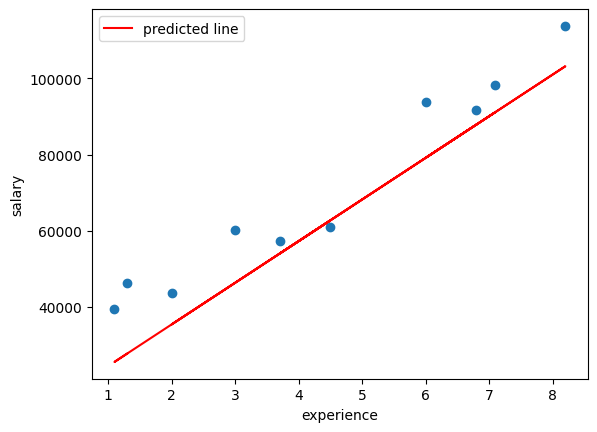

In [ ]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,test_data_presiction,color='red',label='predicted line')
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()
plt.show()